# 6.5 Machine learning clustering

# Importing libraries and data set

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
print('sklearn: %s' % sklearn.__version__)

sklearn: 1.2.1


In [4]:
path = r'D:\Rich\Bus Analyst\1-2-2024 Airline Delays'

In [5]:
df_air_dlay = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','df_air_dlay_mlreg.csv'))

# 2 Data cleaning and basic checks

In [ ]:
# df_air_dlay.head(20)
# df_air_dlay.tail(15)
# df_air_dlay.columns
# df_air_dlay.shape
# df_air_dlay.info()
# df_air_dlay.describe()

In [6]:
df_air_dlay.head(20)

,Unnamed: 0.1,Unnamed: 0,year,carrier,carrier_name,airport,number_arriving_flights,number_flights_delay_greater_than_15min,number_flights_delay_no_crew,number_flights_weather_delay,number_flights_heavy_air_traffic_delay,number_flights_for_same_aircraft_delay
0,0,0,2020,9E,Endeavor Air Inc.,ABE,44,3,1.63,0.00,0.12,1.25
1,1,1,2020,9E,Endeavor Air Inc.,ABY,90,1,0.96,0.00,0.04,0.00
2,2,2,2020,9E,Endeavor Air Inc.,AEX,88,8,5.75,0.00,1.60,0.65
3,3,3,2020,9E,Endeavor Air Inc.,AGS,184,9,4.17,0.00,1.83,3.00
4,4,4,2020,9E,Endeavor Air Inc.,ALB,76,11,4.78,0.00,5.22,1.00
5,5,5,2020,9E,Endeavor Air Inc.,ATL,5985,445,142.89,11.96,161.37,127.79
6,6,6,2020,9E,Endeavor Air Inc.,ATW,142,14,5.36,0.00,7.70,0.94
7,7,7,2020,9E,Endeavor Air Inc.,AVL,147,10,6.04,1.00,1.00,1.96
8,8,8,2020,9E,Endeavor Air Inc.,AZO,84,14,6.24,0.96,6.80,0.00
9,9,9,2020,9E,Endeavor Air Inc.,BDL,150,19,5.70,0.00,12.07,1.23


In [7]:
df_air_dlay.tail(15)

,Unnamed: 0.1,Unnamed: 0,year,carrier,carrier_name,airport,number_arriving_flights,number_flights_delay_greater_than_15min,number_flights_delay_no_crew,number_flights_weather_delay,number_flights_heavy_air_traffic_delay,number_flights_for_same_aircraft_delay
3328,3328,3328,2019,DL,Delta Air Lines Inc.,TPA,1053,169,68.72,11.20,48.84,40.23
3329,3329,3329,2019,DL,Delta Air Lines Inc.,TRI,21,1,0.30,0.00,0.70,0.00
3330,3330,3330,2019,DL,Delta Air Lines Inc.,TUL,86,3,1.17,0.70,0.30,0.83
3331,3331,3331,2019,DL,Delta Air Lines Inc.,TUS,90,20,6.95,1.62,4.04,7.39
3332,3332,3332,2019,DL,Delta Air Lines Inc.,TYS,77,6,5.53,0.00,0.47,0.00
3333,3333,3333,2019,DL,Delta Air Lines Inc.,VPS,152,11,7.06,0.48,1.13,2.33
3334,3334,3334,2019,DL,Delta Air Lines Inc.,XNA,36,1,1.00,0.00,0.00,0.00
3335,3335,3335,2019,EV,ExpressJet Airlines LLC,ABQ,44,12,6.04,0.92,3.63,1.41
3336,3336,3336,2019,EV,ExpressJet Airlines LLC,AEX,75,9,2.38,1.00,0.01,5.61
3337,3337,3337,2019,EV,ExpressJet Airlines LLC,ALB,16,12,4.23,0.00,3.03,4.75


In [8]:
df_air_dlay.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'year', 'carrier', 'carrier_name',
       'airport', 'number_arriving_flights',
       'number_flights_delay_greater_than_15min',
       'number_flights_delay_no_crew', 'number_flights_weather_delay',
       'number_flights_heavy_air_traffic_delay',
       'number_flights_for_same_aircraft_delay'],
      dtype='object')

In [9]:
df_air_dlay.shape

(3343, 12)

In [10]:
df_air_dlay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3343 entries, 0 to 3342
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0.1                             3343 non-null   int64  
 1   Unnamed: 0                               3343 non-null   int64  
 2   year                                     3343 non-null   int64  
 3   carrier                                  3343 non-null   object 
 4   carrier_name                             3343 non-null   object 
 5   airport                                  3343 non-null   object 
 6   number_arriving_flights                  3343 non-null   int64  
 7   number_flights_delay_greater_than_15min  3343 non-null   int64  
 8   number_flights_delay_no_crew             3343 non-null   float64
 9   number_flights_weather_delay             3343 non-null   float64
 10  number_flights_heavy_air_traffic_delay   3343 no

In [11]:
df_air_dlay.describe()

,Unnamed: 0.1,Unnamed: 0,year,number_arriving_flights,number_flights_delay_greater_than_15min,number_flights_delay_no_crew,number_flights_weather_delay,number_flights_heavy_air_traffic_delay,number_flights_for_same_aircraft_delay
count,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000
mean,1671.000000,1671.000000,2019.458271,298.271014,50.995214,16.065337,1.443144,16.183383,17.166069
std,965.185302,965.185302,0.498330,852.436335,146.484456,41.759516,4.821657,56.423008,55.447043
min,0.000000,0.000000,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,835.500000,835.500000,2019.000000,35.000000,5.000000,1.490000,0.000000,0.820000,0.900000
50%,1671.000000,1671.000000,2019.000000,83.000000,12.000000,4.750000,0.060000,2.980000,3.280000
75%,2506.500000,2506.500000,2020.000000,194.500000,33.000000,12.255000,1.010000,8.870000,10.240000
max,3342.000000,3342.000000,2020.000000,19713.000000,2289.000000,697.000000,89.420000,1039.540000,819.660000


In [ ]:
# Renaming colomns was completed in exercise 6.1A

# 2.A Remove any categorical columns to conduct k-means algorithm

# Removing columns
# unnamed: 0.1
# unnamed: 0
# Year
# Carrier
# Carrier_name
# Airport

In [12]:
df_air_dlay = df_air_dlay.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'year', 'carrier', 'carrier_name', 'airport'])

In [13]:
df_air_dlay.columns

Index(['number_arriving_flights', 'number_flights_delay_greater_than_15min',
       'number_flights_delay_no_crew', 'number_flights_weather_delay',
       'number_flights_heavy_air_traffic_delay',
       'number_flights_for_same_aircraft_delay'],
      dtype='object')

In [14]:
df_air_dlay.describe()

,number_arriving_flights,number_flights_delay_greater_than_15min,number_flights_delay_no_crew,number_flights_weather_delay,number_flights_heavy_air_traffic_delay,number_flights_for_same_aircraft_delay
count,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000
mean,298.271014,50.995214,16.065337,1.443144,16.183383,17.166069
std,852.436335,146.484456,41.759516,4.821657,56.423008,55.447043
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,5.000000,1.490000,0.000000,0.820000,0.900000
50%,83.000000,12.000000,4.750000,0.060000,2.980000,3.280000
75%,194.500000,33.000000,12.255000,1.010000,8.870000,10.240000
max,19713.000000,2289.000000,697.000000,89.420000,1039.540000,819.660000


In [15]:
df_air_dlay.head(10)

,number_arriving_flights,number_flights_delay_greater_than_15min,number_flights_delay_no_crew,number_flights_weather_delay,number_flights_heavy_air_traffic_delay,number_flights_for_same_aircraft_delay
0,44,3,1.63,0.00,0.12,1.25
1,90,1,0.96,0.00,0.04,0.00
2,88,8,5.75,0.00,1.60,0.65
3,184,9,4.17,0.00,1.83,3.00
4,76,11,4.78,0.00,5.22,1.00
5,5985,445,142.89,11.96,161.37,127.79
6,142,14,5.36,0.00,7.70,0.94
7,147,10,6.04,1.00,1.00,1.96
8,84,14,6.24,0.96,6.80,0.00
9,150,19,5.70,0.00,12.07,1.23


# 2.B Standardize data, I normalized the data in exercise 6.3

# 3 Use the elbow technique 

In [16]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.
warnings.simplefilter(action='ignore', category=FutureWarning)

In [17]:
score = [kmeans[i].fit(df_air_dlay).score(df_air_dlay) for i in range(len(kmeans))]

In [18]:
score

[-2526987920.793527,
 -900734528.8695068,
 -543517032.046187,
 -285210875.79584384,
 -186102840.26320708,
 -139636728.52635485,
 -104535609.712854,
 -80602679.23930682,
 -61323431.4107786]

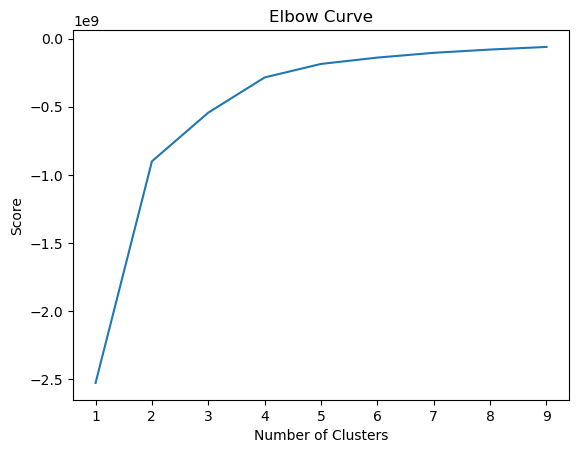

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# 4 Make an informed decision about the number of clusters you'll use in your k-mean algorithm.

# 4.A Explain why you chose that number in a markdown cell.

# The number of clusters would be three.  The reason is the break point in the elbow is three, therefore, three clusters would be the minimum needed.

# 5. Run the k-means algorithm.

In [20]:
# Create the k-means object to the data

kmeans = KMeans(n_clusters = 3) 

In [21]:
kmeans.fit(df_air_dlay)

KMeans(n_clusters=3)

In [22]:
df_air_dlay['clusters'] = kmeans.fit_predict(df_air_dlay)

In [23]:
df_air_dlay.head()

,number_arriving_flights,number_flights_delay_greater_than_15min,number_flights_delay_no_crew,number_flights_weather_delay,number_flights_heavy_air_traffic_delay,number_flights_for_same_aircraft_delay,clusters
0,44,3,1.63,0.0,0.12,1.25,0
1,90,1,0.96,0.0,0.04,0.00,0
2,88,8,5.75,0.0,1.60,0.65,0
3,184,9,4.17,0.0,1.83,3.00,0
4,76,11,4.78,0.0,5.22,1.00,0


In [24]:
df_air_dlay['clusters'].value_counts()

0    3236
1     104
2       3
Name: clusters, dtype: int64

# 7 Create a few different visualizations using the clustered data.

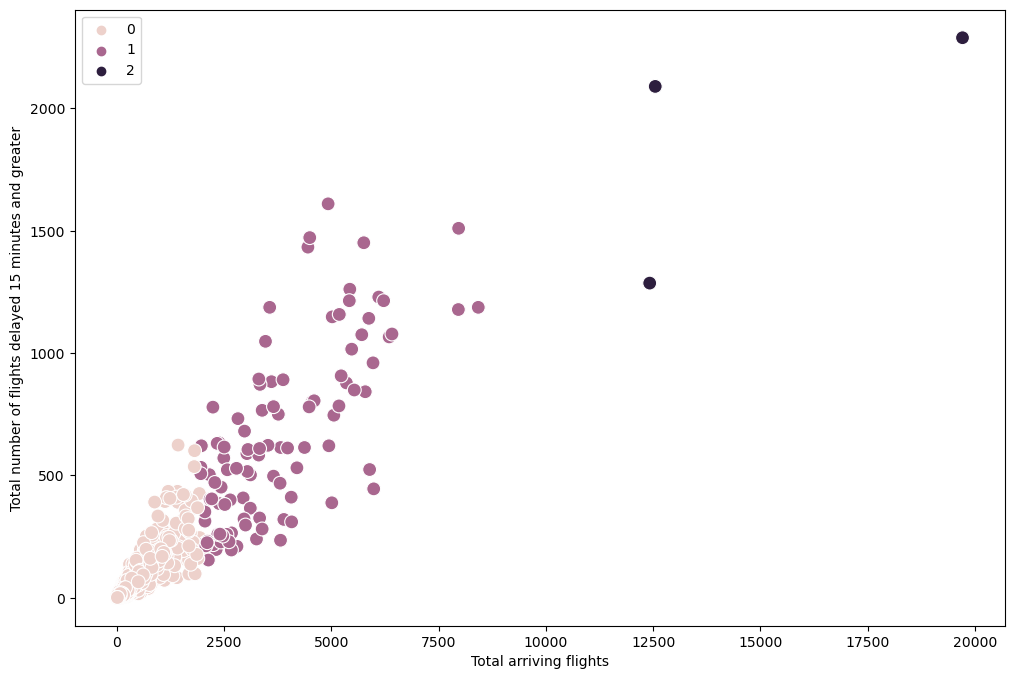

In [25]:
# Plot the clusters for the 'number_arriving_flights' and 'number_flights_delay_greater_than_15min' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_air_dlay['number_arriving_flights'], y=df_air_dlay['number_flights_delay_greater_than_15min'], hue=kmeans.labels_, s=100)

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total arriving flights') # Label x-axis.
plt.ylabel('Total number of flights delayed 15 minutes and greater') # Label y-axis.
plt.show()

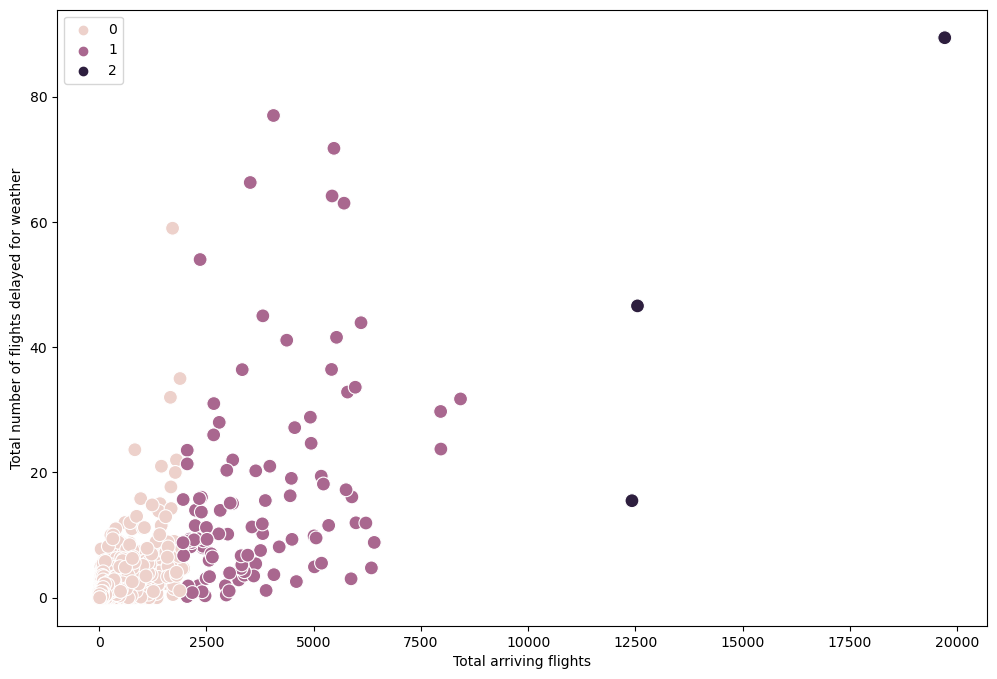

In [26]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_air_dlay['number_arriving_flights'], y=df_air_dlay['number_flights_weather_delay'], hue=kmeans.labels_, s=100)

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total arriving flights') # Label x-axis.
plt.ylabel('Total number of flights delayed for weather') # Label y-axis.
plt.show()

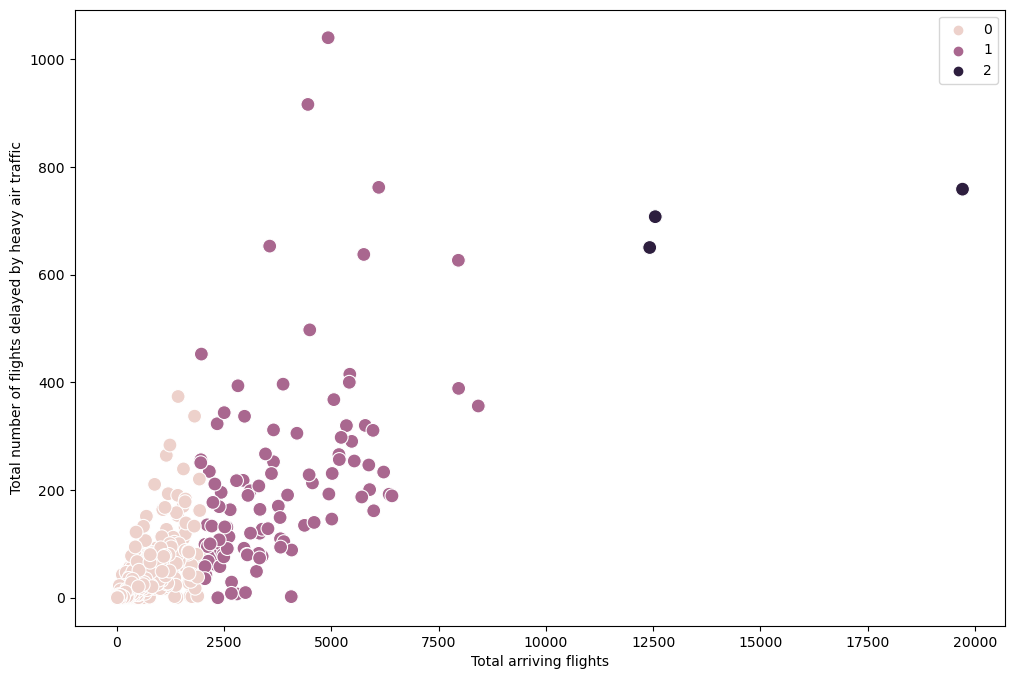

In [27]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_air_dlay['number_arriving_flights'], y=df_air_dlay['number_flights_heavy_air_traffic_delay'], hue=kmeans.labels_, s=100)

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total arriving flights') # Label x-axis.
plt.ylabel('Total number of flights delayed by heavy air traffic') # Label y-axis.
plt.show()

# 8 Discuss how and why the clusters make sense. If they don't make sense, this is useful insights, as it means you'll need to explore the data further.

# In the first scatterplot with total number of flight delays 15 minutes and greater, in the legend code 2, dark color shows the flights with the longest delays. Code 1 in the legend, the light purple, show where most of the flight delays are occuring and code 0, the light pink show the fewest flight delays of 15 minutes or more.

# The second scatterplot with the total number of flight delays because of weather, in the legend code 2, the dark color, show the longest delays because of weather.  Then code 1 in the legend, light purple, show when most of the flight delays are because of weather and code 0 in the legend, light pink, show the fewest flight delays because of weather.

# The final scatterplot with total number of flight delays because of heavy air traffic, code 2, the dark color in the legend show the longest flight delays because of heavy air traffice.  Code 1, light purple, shows the greatest range of flight delays because of heavy air traffice and code 0, light pink show the fewest flight delays because of heavy air traffic. 

# Overall these scatterplots are similar with respect to the delays and the different kinds of delays, total delay, weather delay, and heavy air traffice delay. What should be explored more are these delays with the same airline, carrier, crew, to explore possible further coorelations. 

# 9 Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings. 

In [28]:
df_air_dlay.loc[df_air_dlay['clusters'] == 2, 'cluster'] = 'dark purple'
df_air_dlay.loc[df_air_dlay['clusters'] == 1, 'cluster'] = 'purple'
df_air_dlay.loc[df_air_dlay['clusters'] == 0, 'cluster'] = 'pink'

In [29]:
df_air_dlay.groupby('cluster').agg({'number_arriving_flights':['mean', 'median'],
                                   'number_flights_delay_greater_than_15min': ['mean', 'median'],
                                   'number_flights_weather_delay': ['mean', 'median'],
                                   'number_flights_heavy_air_traffic_delay': ['mean', 'median']})

number_arriving_flights           \
                               mean   median   
cluster                                        
dark purple            14894.000000  12549.0   
pink                     174.168727     79.0   
purple                  3738.730769   3329.0   

            number_flights_delay_greater_than_15min          \
                                               mean  median   
cluster                                                       
dark purple                             1888.333333  2090.0   
pink                                      30.227750    12.0   
purple                                   644.182692   586.0   

            number_flights_weather_delay         \
                                    mean median   
cluster                                           
dark purple                    50.503333  46.60   
pink                            0.916060   0.00   
purple                         16.428365  10.22   

            number_flights_heavy_air_traffic_delay          
                                              mean  median  
cluster                                                     
dark purple                             705.296667  707.34  
pink                                      9.142735    2.74  
purple                                  215.377596  181.98

# 10 Propose what these results could be useful for in future steps of an analytics pipeline.

# The pink color has the best stats for total arriving flights with the fewest delays.  With 79 arriving flights, 30 had delays of 15 minutes or more, 0 for weather delays and 2.7, round it to 3, for heavy air traffic dealys. 

# The purple color was next with 3329 total arriving flights.  586 flights were delayed minutes or longer. There were 10 weather delays and 181 delays for heavy air traffic. 

# The dark purple wiht 12549 total arriving flights, 2090 were delayed 15 minutes or longer.  46 delays werer due to weather and 707 delays from heavy air traffic. 

# These results could be used as a baseline for future projects.  It would be helpful to know and identify which airlines, carriers and airports had the least to most delays. This would be helpful to know if say, airports in Atlanta or California had the least weather delays verses New York or Minnesota because of winter weather for example.  

# Also, over time it would be interesting to see how these clusters change. Perhaps indentify trends and patterns, overall and seasonal delays to find ways to improve air traffic travel for customers and bottomline profits for the airlines. 

# Export df_air_dlay data as 'df_air_dlay_cluster.csv' in Prepared Data

In [30]:
df_air_dlay.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'df_air_dlay_cluster.csv'))